# Exercises

1. Load and display the image 'dog.jfif'. Save the image in png format.
2. *Suggest 2 ways and write codes to display 2 images simultaneously.* You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.
3. Write codes that performs the following:
    * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
    * Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"
4. Enlarge the image "dog.jfif" by using different techniques:
    1) Linear interpolation
   2) Cubic interpolation
   3) Nearest neighbor interpolation.

Upscale the images by **4 times** on its respective dimensions. Perform profiling on each method. Comment on the **execution times** and **quality of resulting images**.

# Setup

In [1]:
import cv2 as cv
import numpy as np

In [11]:
# Question 1
img = cv.imread('images/dog.jfif')
# save the image
cv.imwrite('images/dog_save.png', img)

True

In [12]:
cv.imshow('dog', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [13]:
# Question 2
# 1st method: Call cv.imshow() multiple times
# Use the lena image
img = cv.imread('images/lena.jfif')
gray = cv.imread('images/lena.jfif', 0)

cv.imshow('original', img)
cv.imshow('grayscale', gray)
cv.waitKey(0)
cv.destroyAllWindows()

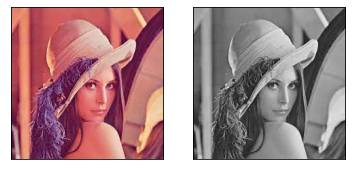

In [17]:
# 2nd method: use matplotlib external library
import matplotlib.pyplot as plt

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.subplot(121), plt.imshow(img_rgb)
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gray, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
# 3rd method: image array concatenation
img = cv.imread('images/lena.jfif')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_gray_3D = cv.cvtColor(img_gray, cv.COLOR_GRAY2BGR)

img_combined = np.hstack((img, img_gray_3D))

cv.imshow('2 images in one window', img_combined)
cv.waitKey(0)
cv.destroyAllWindows()

In [23]:
# Question 3
cap = cv.VideoCapture('videos/img_pexels.mp4')

if not cap.isOpened():
    raise Exception("Can't detect video specified")

width = int(cap.get(3)*0.5)
height = int(cap.get(4)*0.5)
fourcc = cv.VideoWriter_fourcc("M", "J", "P", "G")
fps = 10
out = cv.VideoWriter("videos/img_pexels_small.avi", fourcc, fps, (width, height))

while True:
    ret, frame = cap.read()
    
    if not ret:
        print("Can't receive frame")
        break
        
    # resize
    frame = cv.resize(frame, (width, height))
    
    # show
    cv.namedWindow('small frame', cv.WINDOW_NORMAL)
    cv.imshow('small frame', frame)
    # save
    out.write(frame)
    
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
        
# destroy the constructor
cap.release()
out.release()
cv.destroyAllWindows()

In [8]:
# Practice 4
import time
img = cv.imread('images/dog.jfif')
# NN
start = time.perf_counter()
res_inter_nearest = cv.resize(img, None, fx = 4, fy = 4, 
                             interpolation = cv.INTER_NEAREST)
end = time.perf_counter()
print(f"execution time of nearest neighbor interpolation: {(end - start):.9f}s.")

# Linear
start = time.perf_counter()
res_inter_linear = cv.resize(img, None, fx = 4, fy = 4, 
                             interpolation = cv.INTER_LINEAR)
end = time.perf_counter()
print(f"execution time of bilinear interpolation: {(end - start):.9f}s.")

# cubic
start = time.perf_counter()
res_inter_cubic = cv.resize(img, None, fx = 4, fy = 4, 
                             interpolation = cv.INTER_CUBIC)
end = time.perf_counter()
print(f"execution time of cubic interpolation: {(end - start):.9f}s.")

cv.imshow('nearest neighbor', res_inter_nearest)
cv.imshow('linear', res_inter_linear)
cv.imshow('cubic', res_inter_cubic)
cv.waitKey(0)
cv.destroyAllWindows()

execution time of nearest neighbor interpolation: 0.002138500s.
execution time of bilinear interpolation: 0.002160700s.
execution time of cubic interpolation: 0.002421700s.


It is obvious that the resulting image from *nearest neighbor interpolation* has undesirable jaggedness and artifacts, especially on the contour of the image. The object / foreground boundaries from the *linear and cubic interpolation* are comparatively smoother. Additionally, linear and cubic interpolation generally have higher signal-noise ratio (SNR) as discussed in this [paper](https://www.atlantis-press.com/article/4822.pdf).

As for execution time of each interpolation method, time (from short to long): nearest neighbor < linear < cubic.